In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Reading Data 

In [2]:
train_data= pd.read_csv('historical_data.csv')
test_data= pd.read_csv('predict_data.csv')
print(train_data.columns)
print(test_data.columns)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')
Index(['market_id', 'created_at', 'store_id', 'subtotal',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'delivery_id'],
      dtype='object')


In [3]:
train_data.head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,3441,33.0,14.0,21.0,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,1900,1.0,2.0,2.0,690.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,5477,1900,1.0,0.0,0.0,690.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,5477,6900,1.0,1.0,2.0,289.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,5477,3900,6.0,6.0,9.0,650.0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   subtotal                                      197428 non-null  int64  
 5   total_onshift_dashers                         181166 non-null  float64
 6   total_busy_dashers                            181166 non-null  float64
 7   total_outstanding_orders                      181166 non-null  float64
 8   estimated_store_to_consumer_driving_duration  196902 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   subtotal                                      54778 non-null  int64  
 4   total_onshift_dashers                         50145 non-null  float64
 5   total_busy_dashers                            50145 non-null  float64
 6   total_outstanding_orders                      50145 non-null  float64
 7   estimated_store_to_consumer_driving_duration  54767 non-null  float64
 8   delivery_id                                   54778 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [6]:
print("Train data time line from {} to {}".format(min(train_data['created_at']), max(train_data['created_at'])))
print("Test data time line from {} to {}".format(min(test_data['created_at']), max(test_data['created_at'])))

Train data time line from 1/21/2015 15:22 to 2/9/2015 6:00
Test data time line from 2/18/2015 14:50 to 2/25/2015 5:59


In [7]:
# checking marketplace values

print("Market place values in train data: {}".format(train_data.market_id.unique()))
print("Market place values in test data: {}".format(test_data.market_id.unique()))

Market place values in train data: [ 1.  2.  3.  4. nan  5.  6.]
Market place values in test data: [ 3.  4.  1.  5.  6.  2. nan]


# Data Processing

In [8]:
train_data.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,196902.000000
mean,2.978706,3530.510272,2682.331402,44.808093,41.739747,58.050065,545.358935
std,1.524867,2053.496711,1823.093688,34.526783,32.145733,52.661830,219.352902
min,1.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,1686.000000,1400.000000,17.000000,15.000000,17.000000,382.000000
50%,3.000000,3592.000000,2200.000000,37.000000,34.000000,41.000000,544.000000
75%,4.000000,5299.000000,3395.000000,65.000000,62.000000,85.000000,702.000000
max,6.000000,6987.000000,27100.000000,171.000000,154.000000,285.000000,2088.000000


In [9]:
test_data.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id
count,54528.000000,54778.000000,54778.000000,50145.000000,50145.000000,50145.000000,54767.000000,54778.000000
mean,3.031360,3489.640969,2715.758772,49.076179,43.515206,62.566756,547.765406,126118.103454
std,1.531606,2050.221801,1897.919808,37.594714,34.051339,56.378953,220.459715,72683.611935
min,1.000000,2.000000,0.000000,-1.000000,-4.000000,-9.000000,0.000000,20.000000
25%,2.000000,1661.000000,1420.000000,19.000000,16.000000,19.000000,385.000000,62938.500000
50%,3.000000,3518.000000,2220.000000,41.000000,36.000000,45.000000,544.000000,126194.000000
75%,4.000000,5247.000000,3415.000000,71.000000,63.000000,91.000000,703.000000,188916.000000
max,6.000000,6986.000000,29925.000000,175.000000,169.000000,292.000000,1550.000000,252031.000000


In [10]:
#converting daytime column to daytime object
train_data.created_at = pd.to_datetime(train_data.created_at)
train_data.actual_delivery_time=pd.to_datetime(train_data.actual_delivery_time)

test_data.created_at = pd.to_datetime(test_data.created_at)

In [11]:
## obtaining total delivery duration 
train_data['delivery_time'] = train_data['actual_delivery_time'] - train_data['created_at']
train_data['delivery_time(sec)'] = (train_data['actual_delivery_time'] - train_data['created_at']).dt.total_seconds()

In [12]:
train_data[['estimated_store_to_consumer_driving_duration','delivery_time', 'delivery_time(sec)']].head()

,estimated_store_to_consumer_driving_duration,delivery_time,delivery_time(sec)
0,861.0,0 days 01:03:00,3780.0
1,690.0,0 days 01:07:00,4020.0
2,690.0,0 days 00:30:00,1800.0
3,289.0,0 days 00:52:00,3120.0
4,650.0,0 days 00:40:00,2400.0


In [14]:
#include the month, day and  hour of delivery order
#0 Monday, 6 Sunday
train_data['order_day'] = train_data['created_at'].dt.day
train_data['order_weekday'] = train_data['created_at'].dt.dayofweek
train_data['order_hour'] = train_data['created_at'].dt.hour
train_data['order_month'] = train_data['created_at'].dt.month

test_data['order_day'] = test_data['created_at'].dt.day
test_data['order_weekday'] = test_data['created_at'].dt.dayofweek
test_data['order_hour'] = test_data['created_at'].dt.hour
test_data['order_month'] = test_data['created_at'].dt.month

In [15]:
train_data[['created_at','estimated_store_to_consumer_driving_duration','order_day','order_weekday','order_hour','order_month','delivery_time', 'delivery_time(sec)']].head()

,created_at,estimated_store_to_consumer_driving_duration,order_day,order_weekday,order_hour,order_month,delivery_time,delivery_time(sec)
0,2015-02-06 22:24:00,861.0,6,4,22,2,0 days 01:03:00,3780.0
1,2015-02-10 21:49:00,690.0,10,1,21,2,0 days 01:07:00,4020.0
2,2015-01-22 20:39:00,690.0,22,3,20,1,0 days 00:30:00,1800.0
3,2015-02-03 21:21:00,289.0,3,1,21,2,0 days 00:52:00,3120.0
4,2015-02-15 02:40:00,650.0,15,6,2,2,0 days 00:40:00,2400.0


In [16]:
#Negative values of dashers are set to 0
train_data.loc[train_data.total_onshift_dashers < 0, 'total_onshift_dashers'] = 0
train_data.loc[train_data.total_busy_dashers < 0, 'total_busy_dashers'] = 0
train_data.loc[train_data.total_outstanding_orders < 0, 'total_outstanding_orders'] = 0

test_data.loc[test_data.total_onshift_dashers < 0, 'total_onshift_dashers'] = 0
test_data.loc[test_data.total_busy_dashers < 0, 'total_busy_dashers'] = 0
test_data.loc[test_data.total_outstanding_orders < 0, 'total_outstanding_orders'] = 0


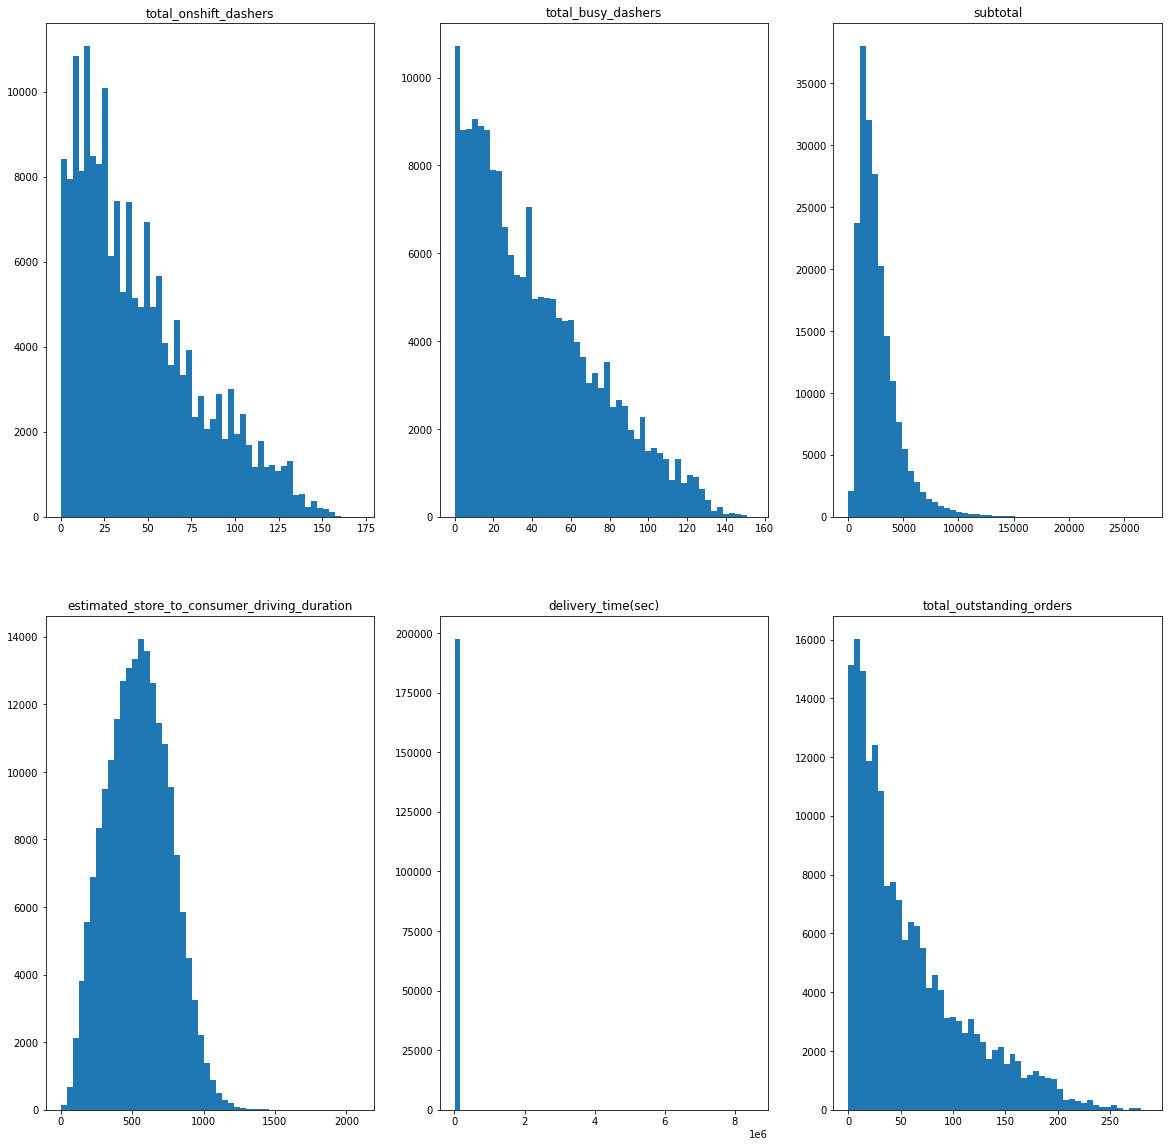

In [18]:
#checking the distributions of numerical features
numerical_features = ['subtotal','total_onshift_dashers','total_busy_dashers','total_outstanding_orders',
                      'estimated_store_to_consumer_driving_duration','delivery_time(sec)']
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
for i,n in enumerate(numerical_features):
    axes[i//3][(i%3)-1].hist(train_data[n],bins=50)
    axes[i//3][(i%3)-1].set_title(n)

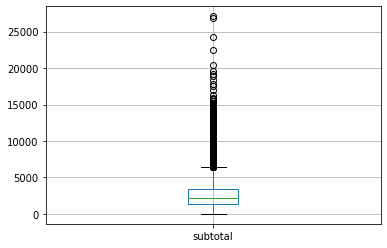

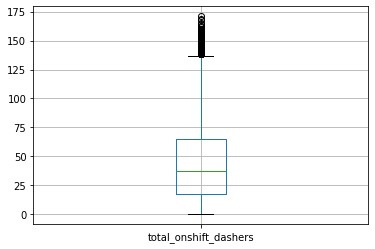

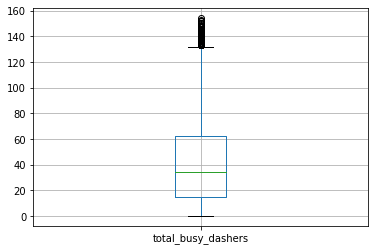

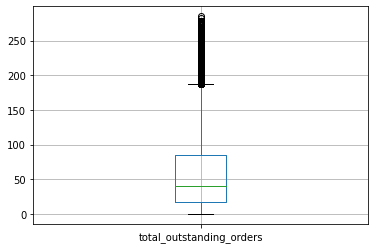

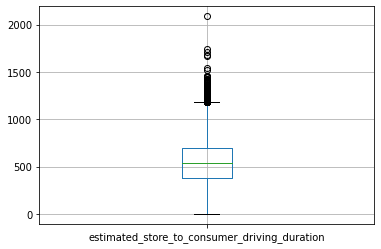

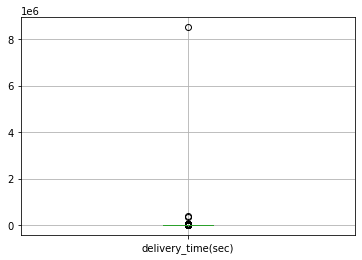

In [19]:
# boxplot of the numerical features
for i in (numerical_features):
    boxplt = train_data.boxplot(column=[i])
    plt.show()

In [20]:
# finding the orders for which delivery time is more than 1 day=86400 seconds
train_data[train_data['delivery_time(sec)']>86400]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time,delivery_time(sec),order_day,order_weekday,order_hour,order_month
2690,1.0,2014-10-19 05:24:00,2015-01-25 19:11:00,3560,1695,NaN,NaN,NaN,412.0,98 days 13:47:00,8516820.0,19,6,5,10
27189,1.0,2015-02-16 02:24:00,2015-02-19 22:45:00,4338,4980,72.0,68.0,104.0,767.0,3 days 20:21:00,332460.0,16,0,2,2
185550,4.0,2015-01-28 08:34:00,2015-02-01 16:25:00,6503,1520,0.0,0.0,0.0,476.0,4 days 07:51:00,373860.0,28,2,8,1


In [21]:
train_data = train_data.drop([2690,27189, 185550])

<AxesSubplot:>

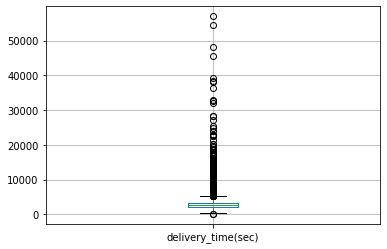

In [22]:
boxplt = train_data.boxplot(column=['delivery_time(sec)'])
boxplt

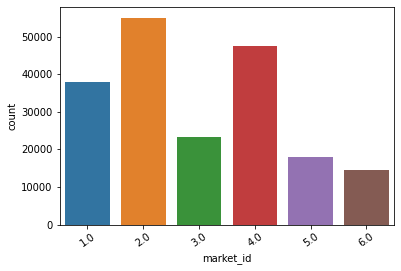

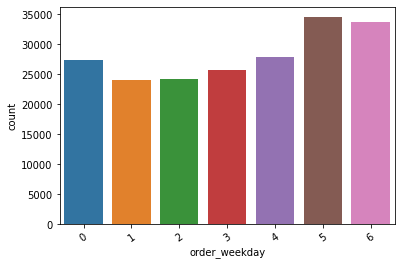

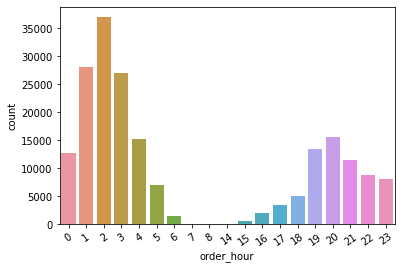

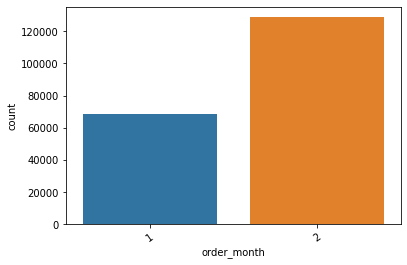

In [24]:
categorical_features = ['market_id','order_weekday','order_hour','order_month']
for i,c in enumerate(categorical_features):
    cat_df = train_data[c].value_counts().to_frame().reset_index()
    cat_df.columns = [c,"count"]
    plt.figure(i)
    sns.barplot(cat_df[c],cat_df["count"])
    plt.xticks(rotation=35)
    #plt.figure(figsize = (10,8))

# Missing value processing

In [25]:
train_data.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
subtotal                                            0
total_onshift_dashers                           16261
total_busy_dashers                              16261
total_outstanding_orders                        16261
estimated_store_to_consumer_driving_duration      526
delivery_time                                       7
delivery_time(sec)                                  7
order_day                                           0
order_weekday                                       0
order_hour                                          0
order_month                                         0
dtype: int64

In [26]:
test_data.isnull().sum()

market_id                                        250
created_at                                         0
store_id                                           0
subtotal                                           0
total_onshift_dashers                           4633
total_busy_dashers                              4633
total_outstanding_orders                        4633
estimated_store_to_consumer_driving_duration      11
delivery_id                                        0
order_day                                          0
order_weekday                                      0
order_hour                                         0
order_month                                        0
dtype: int64

<AxesSubplot:>

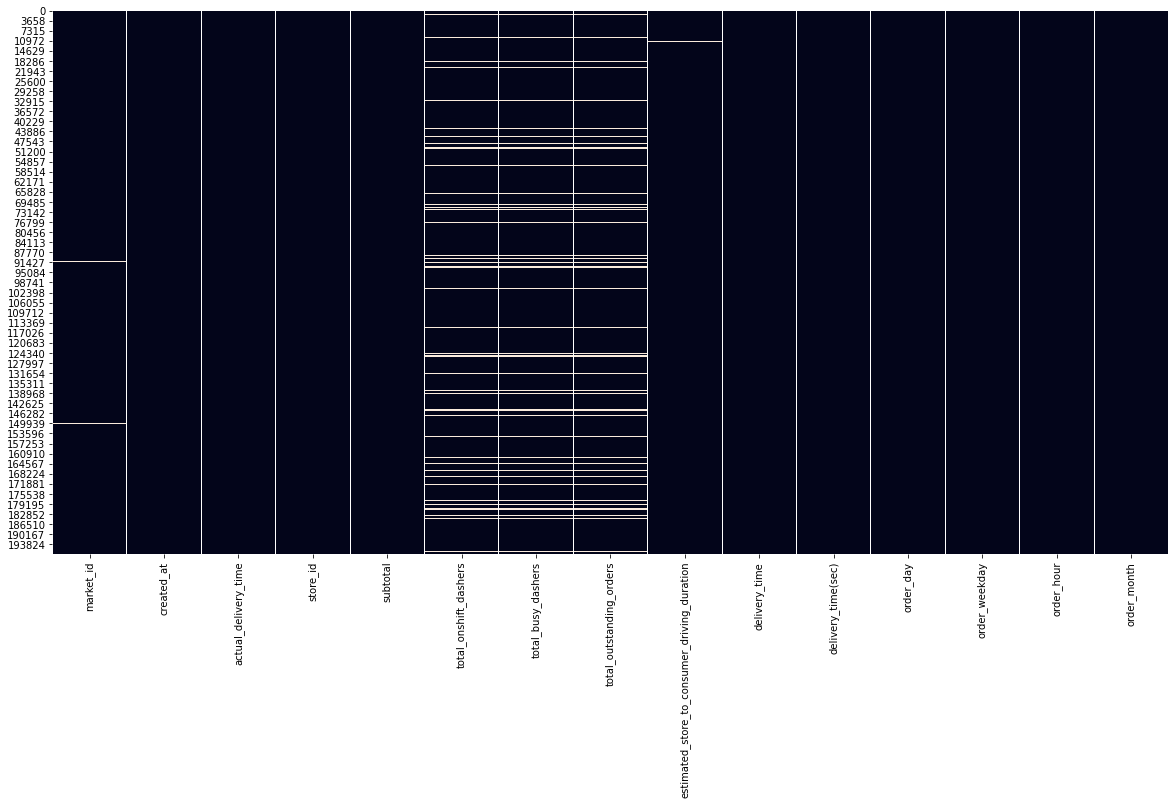

In [27]:
#display the missing value locations 
plt.figure(figsize=(20, 10)) 
sns.heatmap(train_data.isnull(), cbar=False)

In [28]:
#drop nan from actual_delivery_time
train_data = train_data[train_data['actual_delivery_time'].notna()]

In [29]:
#drop nan from market id
train_data = train_data[train_data['market_id'].notna()]
test_data = test_data[test_data['market_id'].notna()]

In [30]:
# fill up nan with same marketplace and same order created month, day, hour
train_data["total_onshift_dashers"] =train_data.groupby(["market_id",'order_month','order_day','order_hour'])['total_onshift_dashers'].transform(lambda x: x.fillna(x.mean()))
train_data["total_busy_dashers"] =train_data.groupby(["market_id",'order_month','order_day','order_hour'])['total_busy_dashers'].transform(lambda x: x.fillna(x.mean()))
train_data["total_outstanding_orders"] =train_data.groupby(["market_id",'order_month','order_day','order_hour'])['total_outstanding_orders'].transform(lambda x: x.fillna(x.mean()))

In [31]:
# fill up nan with same marketplace and same order created month, day, hour
test_data["total_onshift_dashers"] =test_data.groupby(['market_id','order_month','order_day','order_hour'])['total_onshift_dashers'].transform(lambda x: x.fillna(x.mean()))
test_data["total_busy_dashers"] =test_data.groupby(['market_id','order_month','order_day','order_hour'])['total_busy_dashers'].transform(lambda x: x.fillna(x.mean()))
test_data["total_outstanding_orders"] =test_data.groupby(['market_id','order_month','order_day','order_hour'])['total_outstanding_orders'].transform(lambda x: x.fillna(x.mean()))

In [34]:
# after replacing nan values, train and test data has  still nan values
#drop nan from total_onshift_dashers
train_data = train_data[train_data['total_onshift_dashers'].notna()]
test_data = test_data[test_data['total_onshift_dashers'].notna()]

In [35]:
# dropping  rows with nan driving duration values
train_data = train_data[train_data['estimated_store_to_consumer_driving_duration'].notna()]
test_data = test_data[test_data['estimated_store_to_consumer_driving_duration'].notna()]

In [36]:
train_data.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
subtotal                                        0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
delivery_time(sec)                              0
order_day                                       0
order_weekday                                   0
order_hour                                      0
order_month                                     0
dtype: int64

In [37]:
test_data.isnull().sum()

market_id                                       0
created_at                                      0
store_id                                        0
subtotal                                        0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
delivery_id                                     0
order_day                                       0
order_weekday                                   0
order_hour                                      0
order_month                                     0
dtype: int64

In [38]:
train_data.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time,delivery_time(sec),order_day,order_weekday,order_hour,order_month
count,194075.000000,194075.000000,194075.000000,194075.000000,194075.000000,194075.000000,194075.000000,194075,194075.000000,194075.000000,194075.000000,194075.000000,194075.000000
mean,2.950272,3531.895927,2686.878361,44.992858,41.871988,58.399977,545.476723,0 days 00:47:44.150972562,2864.150973,15.277501,3.219044,8.390478,1.654263
std,1.503504,2053.360340,1824.016420,34.128497,31.679201,52.083611,219.299112,0 days 00:19:23.826400543,1163.826401,9.185648,2.049255,8.640787,0.475609
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:02:00,120.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,1686.000000,1405.000000,18.000000,16.000000,18.000000,382.000000,0 days 00:35:00,2100.000000,7.000000,1.000000,2.000000,1.000000
50%,3.000000,3594.000000,2205.000000,37.000000,35.000000,42.000000,544.000000,0 days 00:44:00,2640.000000,14.000000,3.000000,3.000000,2.000000
75%,4.000000,5299.000000,3399.000000,66.000000,62.553470,85.000000,702.000000,0 days 00:56:00,3360.000000,24.000000,5.000000,19.000000,2.000000
max,6.000000,6987.000000,27100.000000,171.000000,154.000000,285.000000,2088.000000,0 days 15:50:00,57000.000000,31.000000,6.000000,23.000000,2.000000


In [39]:
test_data.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,order_day,order_weekday,order_hour,order_month
count,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.000000,54132.0
mean,3.010271,3491.330802,2717.806898,48.978816,43.442034,62.387196,548.056935,126155.193545,21.601068,3.230234,8.503399,2.0
std,1.516484,2050.820342,1896.358720,36.855814,33.365226,55.199649,220.363140,72676.016959,1.918053,2.069659,8.710798,0.0
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,18.000000,0.000000,0.000000,2.0
25%,2.000000,1661.000000,1420.000000,19.000000,17.000000,20.000000,385.000000,62986.250000,20.000000,1.000000,2.000000,2.0
50%,3.000000,3526.000000,2225.000000,41.000000,36.000000,46.000000,544.000000,126266.500000,22.000000,3.000000,3.000000,2.0
75%,4.000000,5250.000000,3419.000000,70.000000,62.000000,91.000000,704.000000,188938.250000,23.000000,5.000000,19.000000,2.0
max,6.000000,6986.000000,29925.000000,175.000000,169.000000,292.000000,1550.000000,252031.000000,25.000000,6.000000,23.000000,2.0


# Data Analysis

<AxesSubplot:>

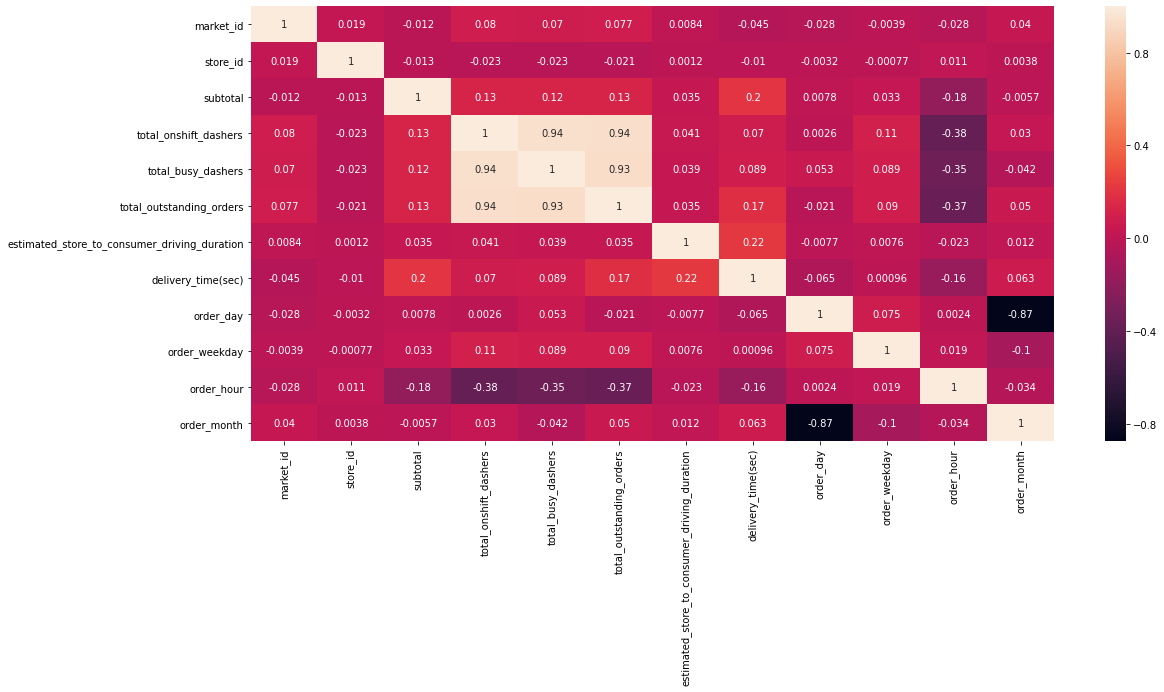

In [43]:
## covariance matrix among different variables
plt.figure(figsize=(18,8))
corr_matrix= train_data.corr()
sns.heatmap(corr_matrix, annot=True)

Analyzing delivery time for  different variables

<AxesSubplot:xlabel='market_id'>

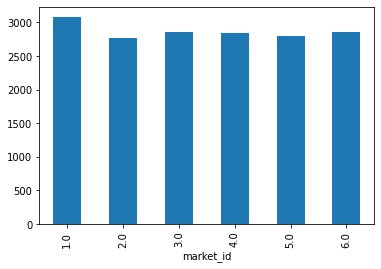

In [42]:
train_data.groupby(['market_id'])['delivery_time(sec)'].mean().plot.bar()

<AxesSubplot:xlabel='market_id', ylabel='delivery_time(sec)'>

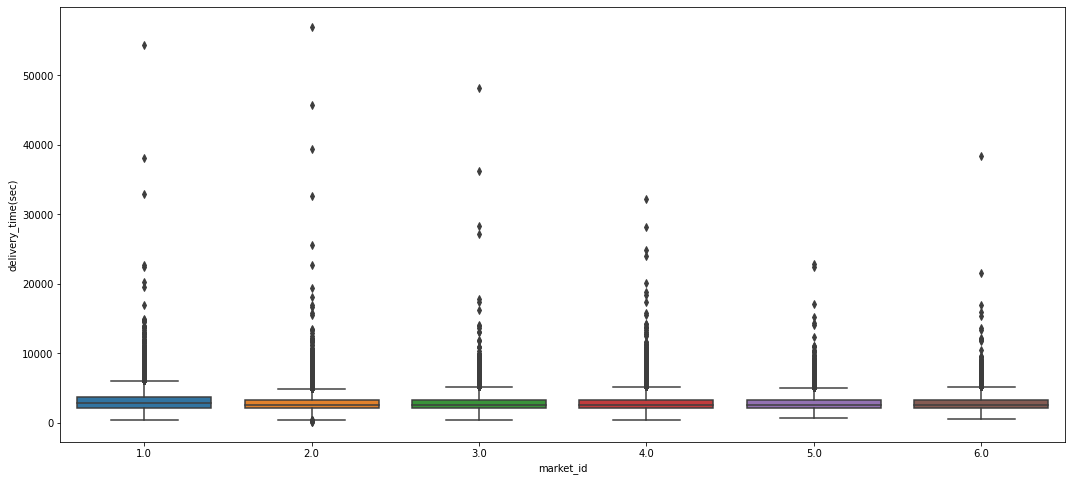

In [44]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train_data,x='market_id',y='delivery_time(sec)')

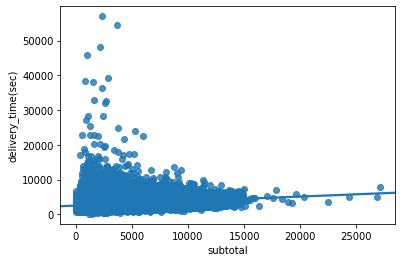

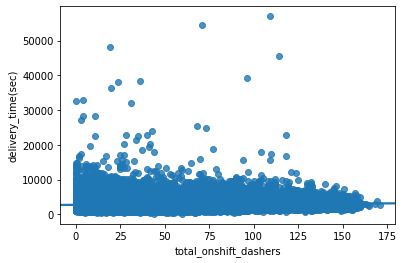

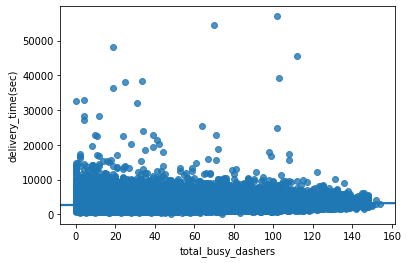

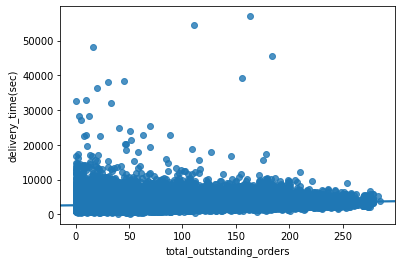

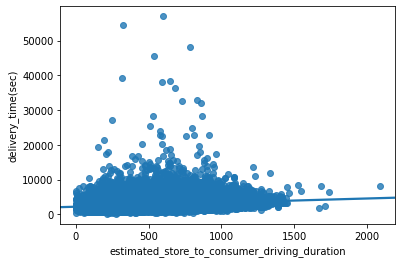

In [48]:
for i in (numerical_features):
    if i!="delivery_time(sec)":
        regplt = sns.regplot(x=i,y="delivery_time(sec)", data=train_data)
        plt.show()

<AxesSubplot:xlabel='created_at'>

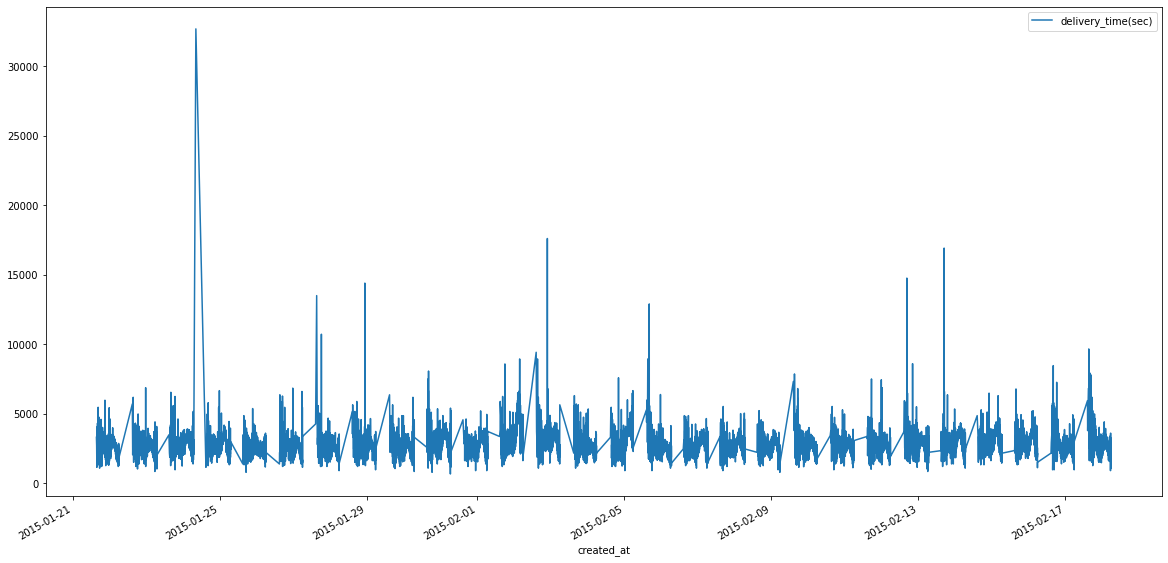

In [49]:
train_data.groupby([train_data["created_at"]]).mean()[['delivery_time(sec)']].plot(legend=True, figsize=(20,10))

<AxesSubplot:xlabel='order_weekday'>

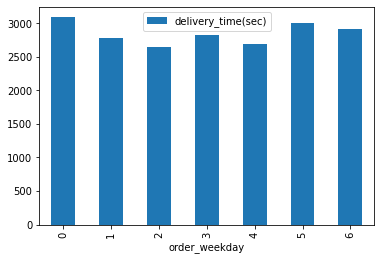

In [50]:

#average delivery time for each woeekday

train_data.groupby(["order_weekday"]).mean()[['delivery_time(sec)']].plot.bar(legend=True)

<AxesSubplot:xlabel='order_weekday'>

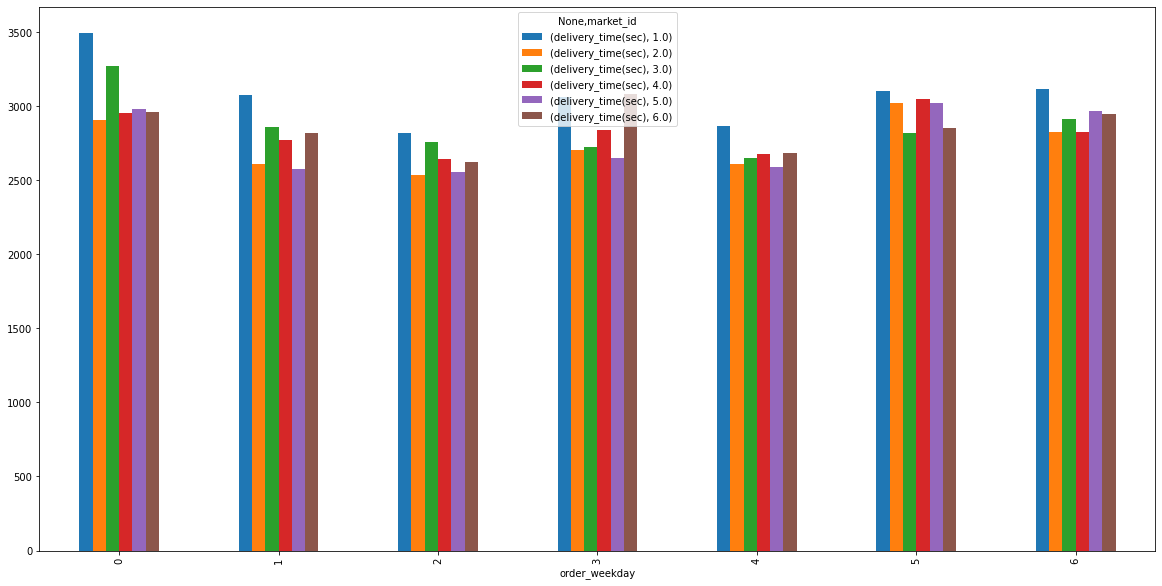

In [51]:

train_data.groupby(["order_weekday",'market_id']).mean()[['delivery_time(sec)']].unstack('market_id').plot.bar(legend=True, figsize=(20,10))

<AxesSubplot:xlabel='order_hour'>

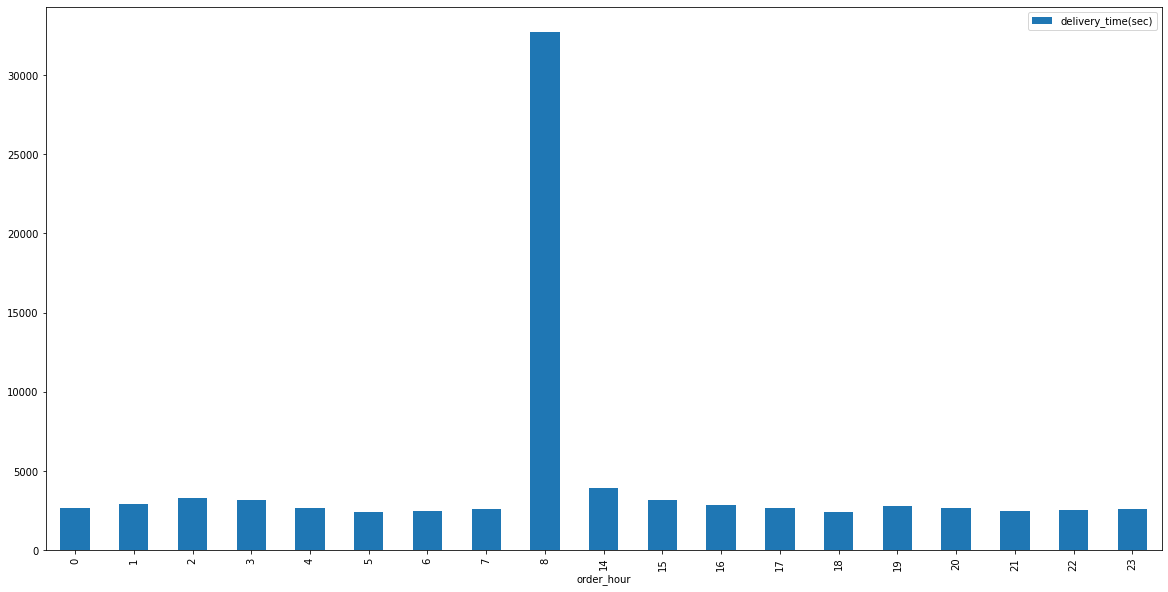

In [52]:
#delivery time per order hour
train_data.groupby(["order_hour"]).mean()[['delivery_time(sec)']].plot.bar(legend=True, figsize=(20,10))

<AxesSubplot:xlabel='order_hour'>

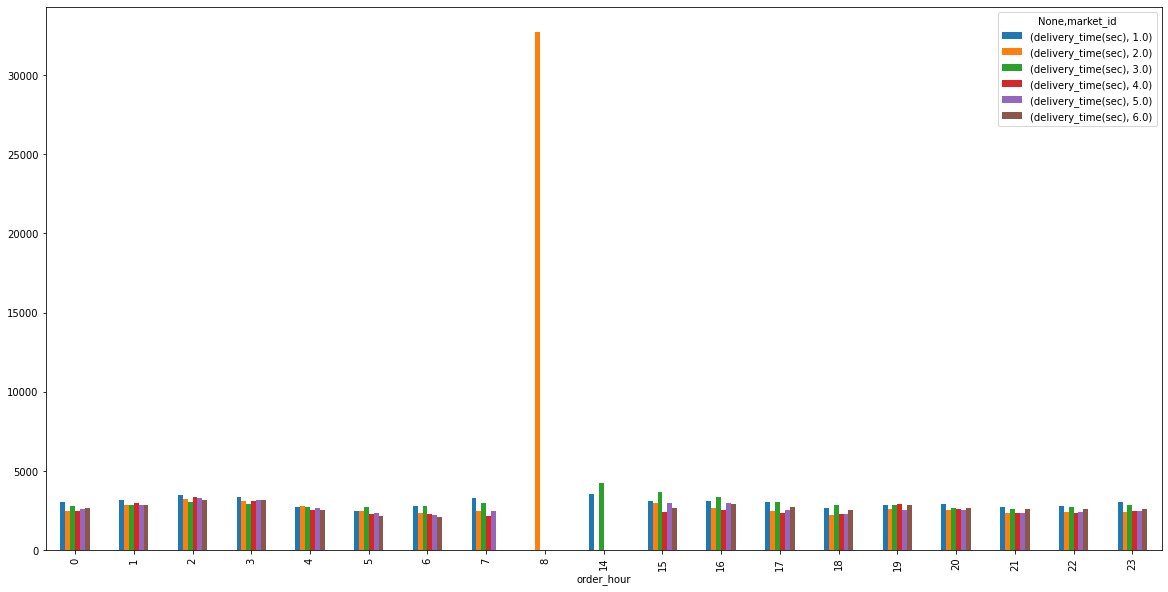

In [53]:
train_data.groupby(["order_hour",'market_id']).mean()[['delivery_time(sec)']].unstack('market_id').plot.bar(legend=True, figsize=(20,10))

In [54]:
train_data[(train_data['order_hour'] == 8) & (train_data['market_id'] == 2)]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time,delivery_time(sec),order_day,order_weekday,order_hour,order_month
63505,2.0,2015-01-24 08:19:00,2015-01-24 17:24:00,441,2740,0.0,0.0,0.0,730.0,0 days 09:05:00,32700.0,24,5,8,1


In [55]:
train_data= train_data.drop([63505])

<AxesSubplot:xlabel='order_hour'>

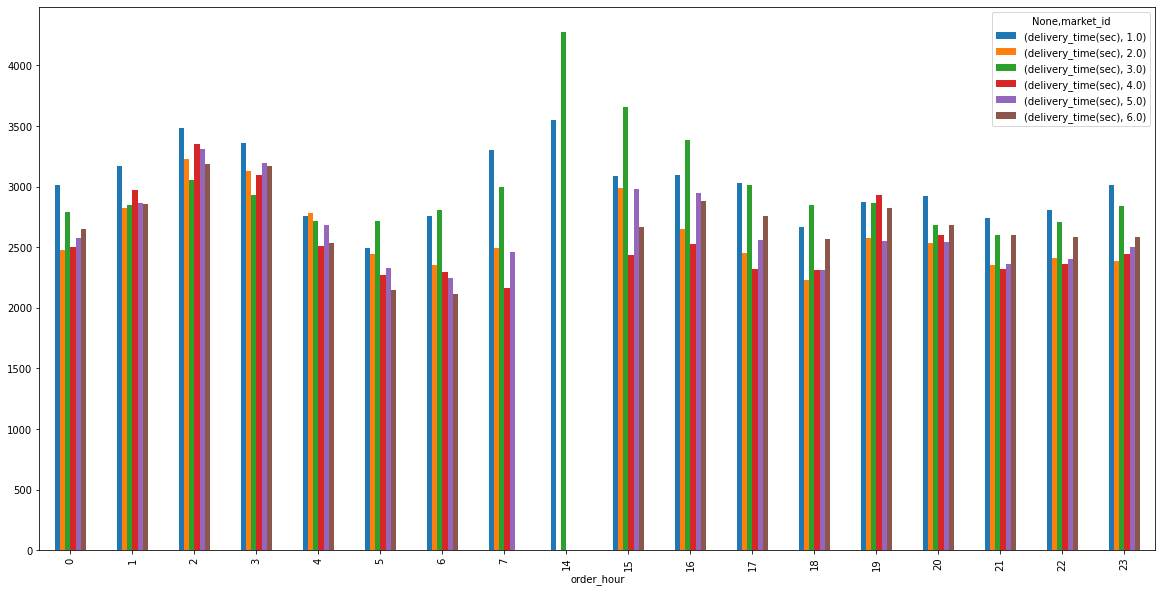

In [56]:
#checking delivery time  for each order hour and marketplace again for any more outliers
train_data.groupby(["order_hour",'market_id']).mean()[['delivery_time(sec)']].unstack('market_id').plot.bar(legend=True, figsize=(20,10))

<AxesSubplot:xlabel='order_hour'>

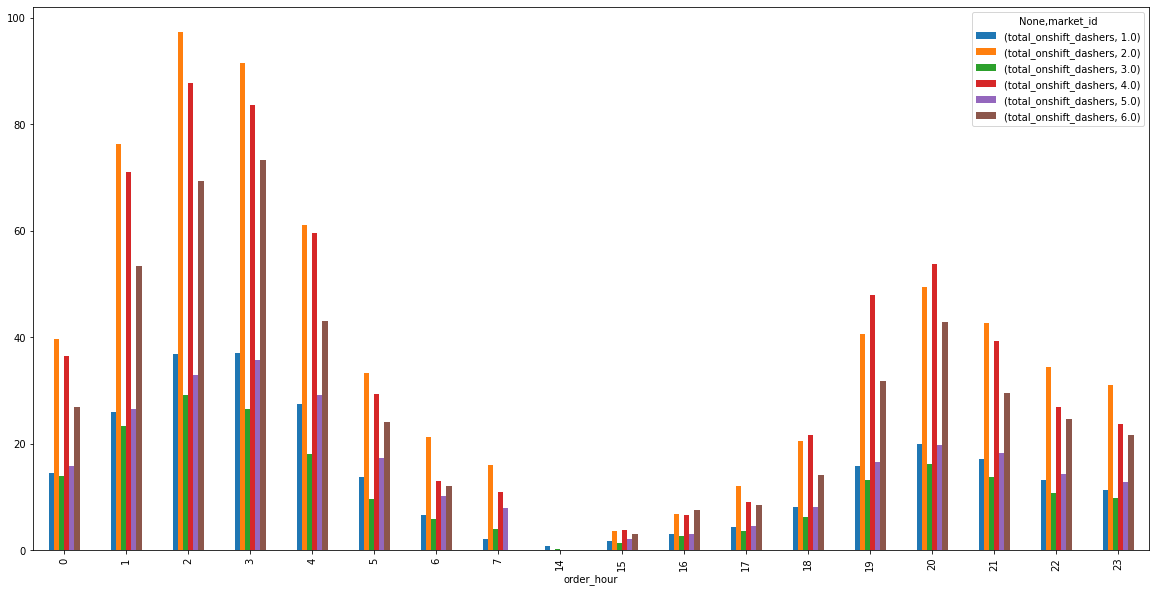

In [57]:
train_data.groupby(["order_hour",'market_id']).mean()[['total_onshift_dashers']].unstack('market_id').plot.bar(legend=True, figsize=(20,10))

In [58]:
# writing processed data into csv files
train_data.to_csv('processed_historical_data.csv')
test_data.to_csv('processed_test_data.csv')

# Machine Learning Models

In [74]:
import numpy as np

In [72]:
def mae(real,pred, tolerance):
    error = 0 
    for r,p in zip(real,pred):
        pred_diff= abs(r-p)
        if pred_diff>tolerance:
            error = error+ pred_diff
    mae = error/len(pred)
    return mae

def mape(real,pred,tolerance): 
    error = 0 
    for r,p in zip(real,pred):
        pred_diff= abs(r-p)
        if pred_diff> tolerance:
            error = error+ pred_diff/r
    mape= error/len(pred)   
    return mape
    
def rmse(real,pred, tolerance): 
    error =0
    for r,p in zip(real, pred):
        pred_diff= abs(r-p)
        if pred_diff> tolerance:
            error= error+ pred_diff* pred_diff
    rmse = np.sqrt(error/len(pred))
    return rmse

In [69]:
#display  errors 
def display_model_evaluation(real,pred,tolerance,name):
    mae_val= mae(real,pred,tolerance)
    mape_val= mape(real,pred,tolerance)
    rmse_val = rmse(real,pred,tolerance)
    data= {'MAE':[mae_val], 'MAPE':[mape_val], 'RMSE':[rmse_val]}
    df= pd. DataFrame(data, index= pd.Series([name]))
    return df

In [59]:
train_data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'delivery_time',
       'delivery_time(sec)', 'order_day', 'order_weekday', 'order_hour',
       'order_month'],
      dtype='object')

In [60]:
test_data.columns

Index(['market_id', 'created_at', 'store_id', 'subtotal',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'delivery_id',
       'order_day', 'order_weekday', 'order_hour', 'order_month'],
      dtype='object')

In [ ]:
y=train_data['delivery_time(sec)'].astype('int64')
features= ['market_id', 'store_id', 'subtotal','total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders','estimated_store_to_consumer_driving_duration', 
       'order_day', 'order_weekday', 'order_hour', 'order_month']
X=train_data[features]

#Partition data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30,random_state=100)  

## Linear Reression

In [63]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

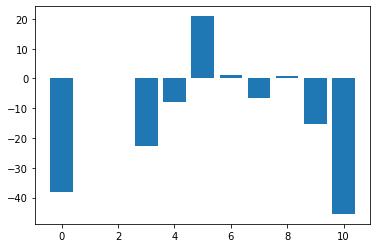

In [64]:
#fit LR model
linear_reg_model = LinearRegression().fit(X_train, y_train)    
# get weights
linear_reg_weights = linear_reg_model.coef_
# plot feature importance
plt.bar([x for x in range(len(linear_reg_weights))], linear_reg_weights)
plt.show()
    

In [70]:
y_train_pred= linear_reg_model.predict(X_train)
y_val_pred= linear_reg_model.predict(X_val)



In [78]:
train_linear_df= display_model_evaluation(y_train, y_train_pred,120,'Linear-Regression-Train-2min')
val_linear_df= display_model_evaluation(y_val, y_val_pred, 120, 'Linear-Regression-Val-2min')



In [95]:
train_linear_df1= display_model_evaluation(y_train, y_train_pred,300,'Linear-Regression-Train-5min')
val_linear_df1= display_model_evaluation(y_val, y_val_pred, 300, 'Linear-Regression-Val-5min')

# Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
random_forest_model = RandomForestRegressor(n_estimators=300, min_samples_split=8, max_features=4)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(max_features=4, min_samples_split=8, n_estimators=300)

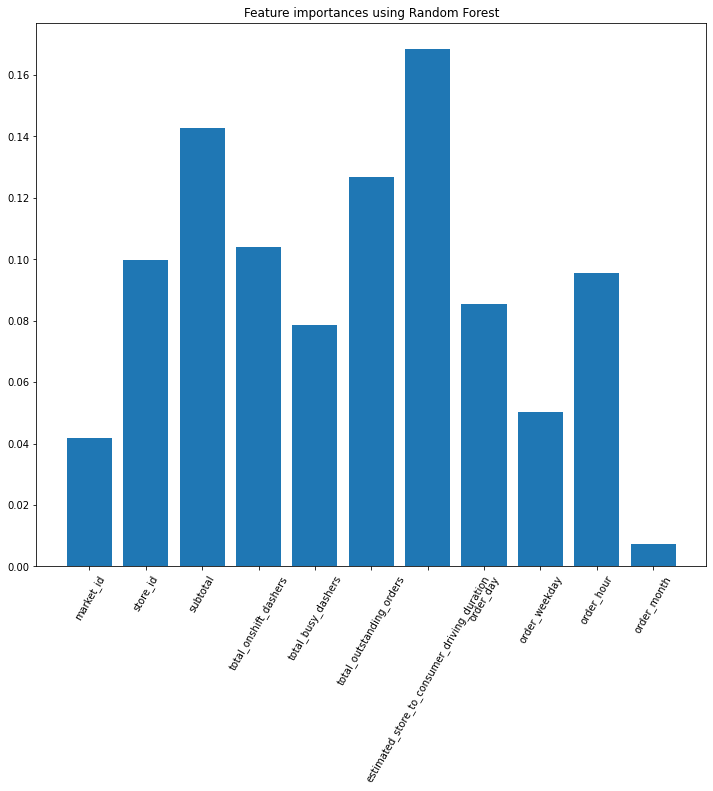

In [120]:
# get weights

rf_weights = random_forest_model.feature_importances_
# plot feature importance
plt.figure(figsize=(12,10))
plt.title('Feature importances using Random Forest')
plt.xticks(rotation=60)
plt.bar(features, rf_weights)
plt.show()

In [86]:
y_train_pred= random_forest_model.predict(X_train)
y_val_pred= random_forest_model.predict(X_val)

In [87]:
train_rf_df= display_model_evaluation(y_train, y_train_pred,120,'Random-Forest-Train-2min')
val_rf_df= display_model_evaluation(y_val, y_val_pred, 120, 'Random-Forest-Val-2min')

print(train_rf_df)
print(val_rf_df)

                                 MAE      MAPE        RMSE
Random-Forest-Train-2min  367.240556  0.137731  587.447477
                               MAE      MAPE        RMSE
Random-Forest-Val-2min  652.640015  0.246237  983.655742


In [96]:
train_rf_df1= display_model_evaluation(y_train, y_train_pred,300,'Random-Forest-Train-5min')
val_rf_df1= display_model_evaluation(y_val, y_val_pred, 300, 'Random-Forest-Val-5min')

print(train_rf_df1)
print(val_rf_df1)

                                 MAE      MAPE        RMSE
Random-Forest-Train-5min  305.766608  0.113285  575.803588
                               MAE      MAPE        RMSE
Random-Forest-Val-5min  615.518933  0.232137  979.458183


## Support Vector Regression

In [89]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [90]:
svm_regr_model = make_pipeline(StandardScaler(), SVR(kernel='poly', epsilon=0.2))
svm_regr_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='poly'))])

In [97]:
y_train_pred= svm_regr_model.predict(X_train)
y_val_pred= svm_regr_model.predict(X_val)

In [98]:
train_svm_df= display_model_evaluation(y_train, y_train_pred,120,'SVMpoly-Train-2min')
val_svm_df= display_model_evaluation(y_val, y_val_pred, 120, 'SVMpoly-Val-2min')

print(train_svm_df)
print(val_svm_df)

                           MAE      MAPE         RMSE
SVMpoly-Train-2min  720.495261  0.255366  1096.407133
                         MAE      MAPE         RMSE
SVMpoly-Val-2min  722.009371  0.255059  1112.066092


In [99]:
train_svm_df1= display_model_evaluation(y_train, y_train_pred,300,'SVMpoly-Train-5min')
val_svm_df1= display_model_evaluation(y_val, y_val_pred, 300, 'SVMpoly-Val-5min')

print(train_svm_df1)
print(val_svm_df1)

                           MAE      MAPE         RMSE
SVMpoly-Train-5min  684.621176  0.241329  1092.767207
                         MAE      MAPE         RMSE
SVMpoly-Val-5min  686.002963  0.240964  1108.470479


In [94]:
svm_regr_model1 = make_pipeline(StandardScaler(), SVR(kernel='rbf', epsilon=0.2))
svm_regr_model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [100]:
y_train_pred= svm_regr_model1.predict(X_train)
y_val_pred= svm_regr_model1.predict(X_val)

In [101]:
train_svm_df2= display_model_evaluation(y_train, y_train_pred,120,'SVMrbf-Train-2min')
val_svm_df2= display_model_evaluation(y_val, y_val_pred, 120, 'SVMrbf-Val-2min')

print(train_svm_df2)
print(val_svm_df2)

                          MAE      MAPE         RMSE
SVMrbf-Train-2min  710.654106  0.250985  1084.507989
                        MAE      MAPE         RMSE
SVMrbf-Val-2min  711.220668  0.250487  1098.510275


In [102]:
train_svm_df3= display_model_evaluation(y_train, y_train_pred,300,'SVMrbf-Train-5min')
val_svm_df3= display_model_evaluation(y_val, y_val_pred, 300, 'SVMrbf-Val-5min')

print(train_svm_df3)
print(val_svm_df3)

                          MAE      MAPE         RMSE
SVMrbf-Train-5min  674.454978  0.236758  1080.795133
                        MAE      MAPE        RMSE
SVMrbf-Val-5min  675.042271  0.236316  1094.85005


# Prediction on the Test Dataset

In [117]:
evaluation_df= pd.concat([train_linear_df,val_linear_df,
                          train_linear_df1,val_linear_df1,
                          train_rf_df, val_rf_df,
                          train_rf_df1, val_rf_df1,
                          train_svm_df, val_svm_df,
                          train_svm_df1,val_svm_df1,
                          train_svm_df2, val_svm_df2,
                          train_svm_df3,val_svm_df3
                         
                         ])
evaluation_df

,MAE,MAPE,RMSE
Linear-Regression-Train-2min,704.390298,0.265818,1033.533174
Linear-Regression-Val-2min,703.410859,0.264743,1047.278834
Linear-Regression-Train-5min,305.766608,0.113285,575.803588
Linear-Regression-Val-5min,615.518933,0.232137,979.458183
Random-Forest-Train-2min,367.240556,0.137731,587.447477
Random-Forest-Val-2min,652.640015,0.246237,983.655742
Random-Forest-Train-5min,305.766608,0.113285,575.803588
Random-Forest-Val-5min,615.518933,0.232137,979.458183
SVMpoly-Train-2min,720.495261,0.255366,1096.407133
SVMpoly-Val-2min,722.009371,0.255059,1112.066092


In [106]:
X_test = test_data[features]
y_test = random_forest_model.predict(X_test)

In [111]:
test_data['predicted_delivery_time(sec)']= y_test

#print out the final prediction of delivery duration
print("Predictions for deliveries: ")
print(test_data[['delivery_id','created_at','predicted_delivery_time(sec)' ]])

Predictions for deliveries: 
       delivery_id          created_at  predicted_delivery_time(sec)
0           194096 2015-02-25 02:22:00                   3100.508223
1           236895 2015-02-25 01:14:00                   3041.400016
2           190868 2015-02-22 02:27:00                   3890.114240
3           183076 2015-02-25 01:32:00                   2969.228619
4           186200 2015-02-24 05:20:00                   3026.189632
...            ...                 ...                           ...
54773       174203 2015-02-20 18:11:00                   2877.428276
54774       138333 2015-02-21 21:01:00                   2606.894995
54775        34110 2015-02-21 18:19:00                   2548.009674
54776       178028 2015-02-19 23:43:00                   3253.446428
54777       132824 2015-02-23 02:27:00                   2887.945301

[54132 rows x 3 columns]


In [116]:
test_data.to_csv('predictions.csv')